# Takara Nishizaki

## Research Question: How do Red/Yellow cards affect the satisfaction and excitement of the fans watching the game in the stadium?

I would like to analyze the relationship between penalized cards and how satisfied or excited the fans get. For example, do fans get more excited when there are lot of cards and the game gets heated? I will analyze the relationship by looking at the cards statistic in the dataset, and comparing it with the match excitement statistics in the dataset which is rated out of 10. In addition to this, I will further look into how many fouls each team has commited to see if more fouls lead to an accumulation of cards. To visualize these information, I will make several plots that connect each of the variables that I am looking at, and making a joint plot at the end with the three variables to see the connection between all of the information. 

## **EDA on my dataset**  (Milestone 3, Task 1)

In [2]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
#Downloading necessary dataset for project
df_all = pd.read_csv("../../Group14/data/raw/archive/matchesall2014-2020.csv")

In [3]:
#Looking at the shape and description of the dataset.

print (df_all.shape)
df_all.columns

(2660, 41)


Index(['Unnamed: 0', 'Home Team', 'Away Team', 'Score', 'Half Time Score',
       'Match Excitement', 'Home Team Rating', 'Away Team Rating',
       'Home Team Possession %', 'Away Team Possession %',
       'Home Team Off Target Shots', 'Home Team On Target Shots',
       'Home Team Total Shots', 'Home Team Blocked Shots', 'Home Team Corners',
       'Home Team Throw Ins', 'Home Team Pass Success %',
       'Home Team Aerials Won', 'Home Team Clearances', 'Home Team Fouls',
       'Home Team Yellow Cards', 'Home Team Second Yellow Cards',
       'Home Team Red Cards', 'Away Team Off Target Shots',
       'Away Team On Target Shots', 'Away Team Total Shots',
       'Away Team Blocked Shots', 'Away Team Corners', 'Away Team Throw Ins',
       'Away Team Pass Success %', 'Away Team Aerials Won',
       'Away Team Clearances', 'Away Team Fouls', 'Away Team Yellow Cards',
       'Away Team Second Yellow Cards', 'Away Team Red Cards',
       'Home Team Goals Scored', 'Away Team Goals Scored

In [4]:
#Dropping columns that are not necessary for my research, then dropping any NA values.

df_subset = df_all[["Home Team", "Away Team", "Score", "Match Excitement", "Home Team Fouls", "Home Team Yellow Cards", "Home Team Second Yellow Cards", "Home Team Red Cards", "Away Team Fouls", "Away Team Yellow Cards", "Away Team Second Yellow Cards", "Away Team Red Cards", "year"]]
df_subset = df_subset.dropna()
df_subset


,Home Team,Away Team,Score,Match Excitement,Home Team Fouls,Home Team Yellow Cards,Home Team Second Yellow Cards,Home Team Red Cards,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,year
0,MAN UTD,SWANSEA,1-2,5.9,14.0,2.0,0.0,0.0,20.0,4.0,0.0,0.0,2014
1,WEST BROM,SUNDERLAND,2-2,7.3,18.0,3.0,0.0,0.0,9.0,1.0,0.0,0.0,2014
2,LEICESTER CITY,EVERTON,2-2,7.0,16.0,1.0,0.0,0.0,10.0,1.0,0.0,0.0,2014
3,WEST HAM,TOTTENHAM,0-1,4.8,12.0,2.0,1.0,0.0,10.0,0.0,0.0,1.0,2014
4,QPR,HULL CITY,0-1,3.8,10.0,1.0,0.0,0.0,10.0,2.0,0.0,0.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,ARSENAL,BRIGHTON,2-0,4.5,10.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,2020
2656,SHEFFIELD UTD,BURNLEY,1-0,3.6,11.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,2020
2657,LEICESTER CITY,TOTTENHAM,2-4,8.7,9.0,0.0,0.0,0.0,8.0,2.0,0.0,0.0,2020
2658,WEST HAM,SOUTHAMPTON,3-0,5.8,5.0,0.0,0.0,0.0,9.0,3.0,0.0,0.0,2020


There were no NA values in this dataset, so we now have a complete dataset with only the columns that are suitable for this research.

In [5]:
#Making a new column for my dataset that helps with my research.

df_subset["Total_Fouls"] = df_subset["Home Team Fouls"] + df_subset["Away Team Fouls"]
df_subset["Total_Yellow_Cards"] = df_subset["Home Team Yellow Cards"] + df_subset["Home Team Second Yellow Cards"] + df_subset["Away Team Yellow Cards"] + df_subset["Away Team Second Yellow Cards"]
df_subset["Total_Red_Cards"] = df_subset["Home Team Red Cards"] + df_subset["Away Team Red Cards"]

df_subset

,Home Team,Away Team,Score,Match Excitement,Home Team Fouls,Home Team Yellow Cards,Home Team Second Yellow Cards,Home Team Red Cards,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,year,Total_Fouls,Total_Yellow_Cards,Total_Red_Cards
0,MAN UTD,SWANSEA,1-2,5.9,14.0,2.0,0.0,0.0,20.0,4.0,0.0,0.0,2014,34.0,6.0,0.0
1,WEST BROM,SUNDERLAND,2-2,7.3,18.0,3.0,0.0,0.0,9.0,1.0,0.0,0.0,2014,27.0,4.0,0.0
2,LEICESTER CITY,EVERTON,2-2,7.0,16.0,1.0,0.0,0.0,10.0,1.0,0.0,0.0,2014,26.0,2.0,0.0
3,WEST HAM,TOTTENHAM,0-1,4.8,12.0,2.0,1.0,0.0,10.0,0.0,0.0,1.0,2014,22.0,3.0,1.0
4,QPR,HULL CITY,0-1,3.8,10.0,1.0,0.0,0.0,10.0,2.0,0.0,0.0,2014,20.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,ARSENAL,BRIGHTON,2-0,4.5,10.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,2020,18.0,0.0,0.0
2656,SHEFFIELD UTD,BURNLEY,1-0,3.6,11.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,2020,12.0,4.0,0.0
2657,LEICESTER CITY,TOTTENHAM,2-4,8.7,9.0,0.0,0.0,0.0,8.0,2.0,0.0,0.0,2020,17.0,2.0,0.0
2658,WEST HAM,SOUTHAMPTON,3-0,5.8,5.0,0.0,0.0,0.0,9.0,3.0,0.0,0.0,2020,14.0,3.0,0.0


I added three additional columns that might be helpful for this research. I have combined the fouls and cards statistics between the home and away teams, because we are looking at the game in total currently, and don't favour the home or away.

In [6]:
#Setting themes and styles for seaborn.

sns.set_theme(style="ticks")

Text(0, 0.5, 'Match Excitement Rating out of 10')

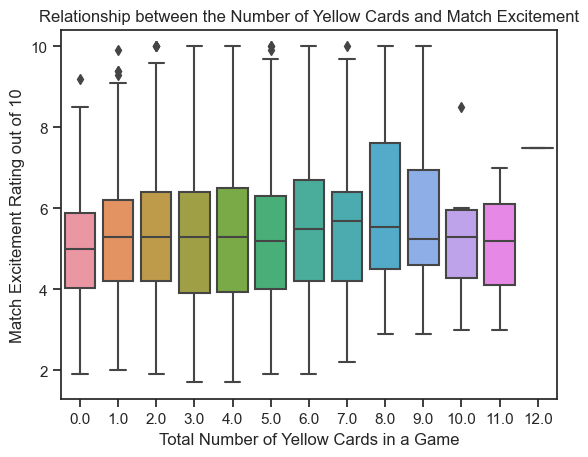

In [7]:
#Boxplot between total yellow cards and match excitement.

sns.boxplot(x='Total_Yellow_Cards', y='Match Excitement', data=df_subset)
plt.title("Relationship between the Number of Yellow Cards and Match Excitement")
plt.xlabel("Total Number of Yellow Cards in a Game")
plt.ylabel("Match Excitement Rating out of 10")

I wanted to see the correlation between the increased number of yellow cards, and if the match will be more heated, which will result to fans getting more excited. However, it seems that there are a slight increase, but it stays the same in general. There are a few outliers on the higher end of the match rating, which is probably caused through other variables that are not card related.

Text(0, 0.5, 'Total Number of Fouls in a Game')

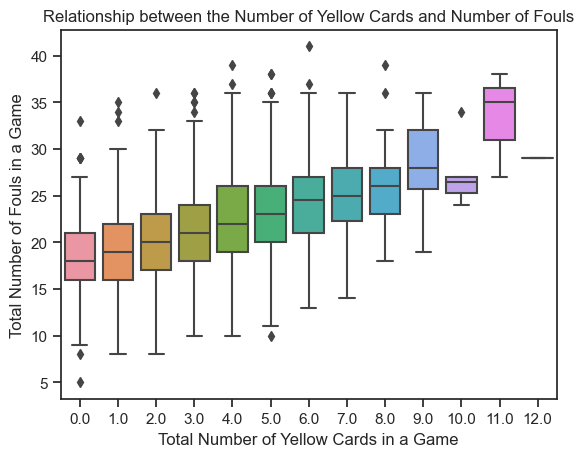

In [8]:
#Plot between total fouls and total yellow cards.

sns.boxplot(x='Total_Yellow_Cards', y='Total_Fouls', data=df_subset)
plt.title("Relationship between the Number of Yellow Cards and Number of Fouls")
plt.xlabel("Total Number of Yellow Cards in a Game")
plt.ylabel("Total Number of Fouls in a Game")

This boxplot shows the correlation between the number of yellow cards and the fouls committed by both teams. As the number of fouls increase, the amount of cards increase as well, because the referee wants to control the game better. Therefore, we can say that disciplinary actions are punished by cards and the players are penalized. 

Text(0, 0.5, 'Mean of Match Excitement Rating out of 10')

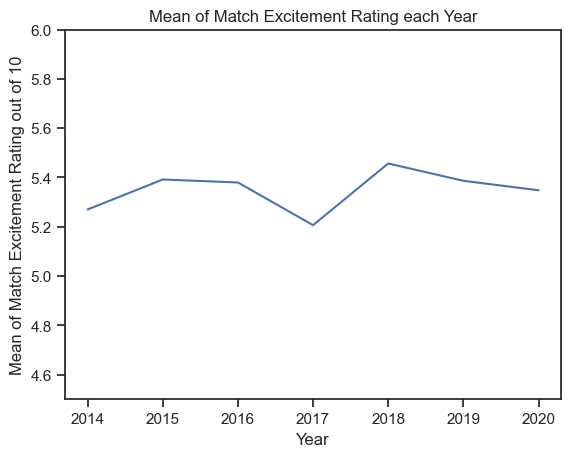

In [9]:
#Average match excitement rate by Year

mean_Excitement = df_subset.groupby('year')['Match Excitement'].mean()
mean_Excitement_df = mean_Excitement.to_frame().reset_index()
mean_Excitement_df.columns=["year", "mean"]
sns.lineplot(x='year', y='mean', data=mean_Excitement_df, markers=True)
plt.ylim([4.5,6])
plt.title("Mean of Match Excitement Rating each Year")
plt.xlabel("Year")
plt.ylabel("Mean of Match Excitement Rating out of 10")

Text(0, 0.5, 'Mean of Yellow Cards')

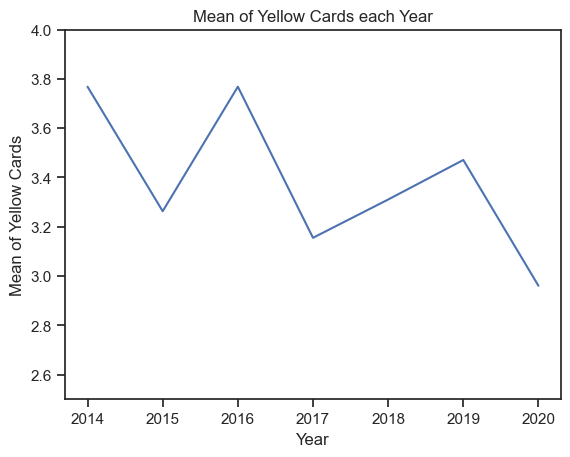

In [10]:
#Average cards given out by Year

mean_Yellow_Cards = df_subset.groupby('year')['Total_Yellow_Cards'].mean()
mean_Yellow_Cards_df = mean_Yellow_Cards.to_frame().reset_index()
mean_Yellow_Cards_df.columns=["year", "mean"]
sns.lineplot(x='year', y='mean', data=mean_Yellow_Cards_df, markers=True)
plt.ylim([2.5,4])
plt.title("Mean of Yellow Cards each Year")
plt.xlabel("Year")
plt.ylabel("Mean of Yellow Cards")

The two line plots above shows the mean of the match excitements and yellow cards by year. I created these line plots to see if there were any significant differences between each year. Every year has a different standard of refereeing and this could have caused how the games turned out. Overall, we can see that there are no significant differences. Although the plots do look like there are a big shift, it is because I have shrinked the scale on the y-axis to enhance the graphs.

## **Refining my Research Questions** (Milestone 3, Task 2)

Overall, the graphs have answered the simpler side of questions that I asked for my reseach project. I was able to drop columns that were unnecessary to my project. In addition to that, I have grouped several information by years, which I would later be able to compare by years.

Another perspective that I can see this is by the teams, because there are conspiracies where some teams are getting more advantages from referees while other teams struggle through this. I  would be able to test this by grouping the teams and looking at the card statistics to see if certain teams are favoured over another. 

On my next milestone, I will try to join all of the plots that I have made so far to see if I can see any further correlation between the columns that I have searched through as of now. 

## **Data Analysis Pipeline** (Milestone 4, Task 1)

In my previous milestone, I have done the first 4 common steps of data analysis pipeline. Therefore, I will explain in words about the different processing that I did.

First, we as a group looked into the data, and explained further about the 5 W's and how, in regards to this dataset. We have also identified the data format as well, which is located in the title page of our repository.

Secondly, for cleaning the data, we worked on these individually. Since my research focuses on the match excitement and its relationship with the cards given out during the game, I kept those columns along with the score and team names. This process decreased my dataset from 41 columns to 13, which simplified the dataset so it will be easier to work with. Additionally, I used the df.dropna code to drop any NA values, but since it was non existent in this dataset, I did not have to worry about the missing values.

Next, I created a couple columns that would be beneficiary for my research. I added the home and away yellow/red cards to create a new column named "Total Yellow Cards", and "Total Red Cards". Along with that, I also added the home and away fouls, to create a new column named "Total Fouls". These did not have any outliers because it includes all of the games from the regular season, so I did not have to exclude any rows/columns when dealing with this data.

Finally, as for grouping objects together using the groupby function, I did this when making the various plots of the latter part of Milestone 3. I grouped the years together so that I can see if there were any differences between the statistics per year, since referee standards can differ each year. Using the groupby function, I was able to plot the differences afterwards. 

## **Method Chaining** (Milestone 4, Task 2)

In [3]:
#Beginning of Method Chaining

df_subset = (
    pd.read_csv("../../Group14/data/raw/archive/matchesall2014-2020.csv")
    .dropna()
    .assign(Total_Fouls=lambda x: x["Home Team Fouls"] + x["Away Team Fouls"])
    .assign(Total_Yellow_Cards=lambda x: x["Home Team Yellow Cards"] + x["Away Team Yellow Cards"])
    .assign(Total_Red_Cards=lambda x: x["Home Team Red Cards"] + x["Away Team Red Cards"])
    .loc[:, ["Home Team", "Away Team", "Score", "Match Excitement", "Home Team Fouls", "Home Team Yellow Cards", "Home Team Second Yellow Cards", "Home Team Red Cards", "Away Team Fouls", "Away Team Yellow Cards", "Away Team Second Yellow Cards", "Away Team Red Cards", "year", "Total_Fouls", "Total_Yellow_Cards", "Total_Red_Cards"]]
)
df_subset = pd.DataFrame(df_subset)
    

In [9]:
from code import project_functions3
df_subset = project_functions3.load_and_process("../../Group14/data/raw/archive/matchesall2014-2020.csv")
df_subset

ImportError: cannot import name 'project_functions3' from 'code' (/Users/takaranishizaki/miniconda3/lib/python3.10/code.py)